In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Pokemon.csv')

In [27]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df[features]

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

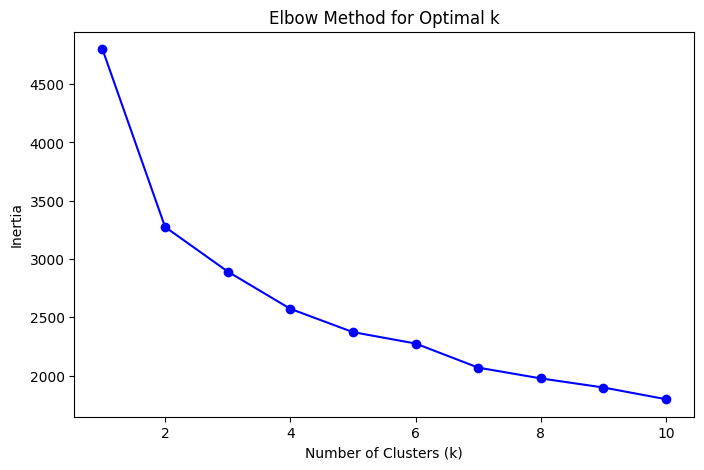

In [29]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [30]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [31]:
cluster_means = df.groupby('Cluster')[features].mean()
print(cluster_means)

                HP     Attack     Defense    Sp. Atk    Sp. Def      Speed
Cluster                                                                   
0        51.564669  56.198738   54.993691  49.719243  50.949527  49.593060
1        71.892377  87.937220   67.838565  89.322870  74.955157  98.237668
2        88.573077  99.138462  101.973077  86.830769  94.830769  65.361538


In [32]:
from sklearn.decomposition import PCA

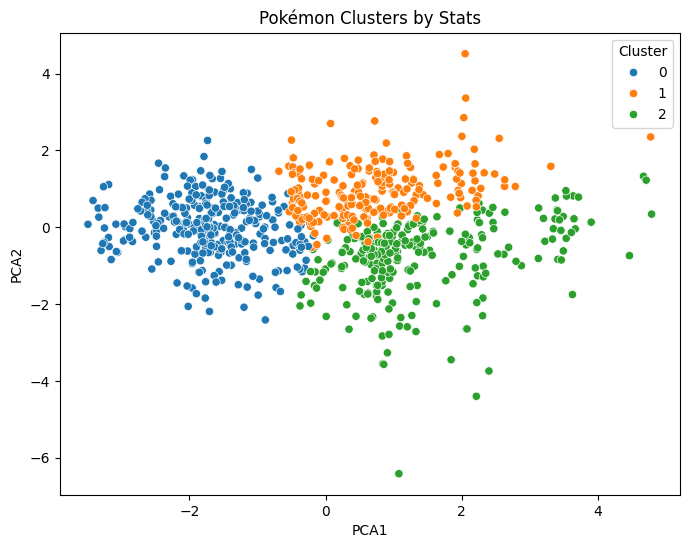

In [33]:
# graph
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Pokémon Clusters by Stats')
plt.show()
